In [15]:
import gym
import random
import numpy as np
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [16]:
env_name = "Pendulum-v0"
env = gym.make(env_name)
print(env.observation_space)
print(env.action_space)
type(env.action_space)

Box(-8.0, 8.0, (3,), float32)
Box(-2.0, 2.0, (1,), float32)


gym.spaces.box.Box

In [61]:
discrete_os_size = (13, 11, 12)
discrete_os_win_size = (env.observation_space.high - env.observation_space.low)/discrete_os_size
discrete_os_win_size
discrete_os_nsize = (14, 12, 13)

In [93]:
discrete_action_size = (2)
discrete_action_win_size = (env.action_space.high - env.action_space.low)/discrete_action_size
discrete_action_win_size

array([2.], dtype=float32)

In [94]:
q_table = np.zeros(discrete_os_nsize + (discrete_action_size,))
q_table.shape

(14, 12, 13, 2)

In [88]:
def get_discrete_state(state):
    discrete_state = (state - env.observation_space.low)/discrete_os_win_size
    return tuple(discrete_state.astype(int))

In [95]:
class QAgent():
    def __init__(self, env):
        self.action_low = env.action_space.low
        self.action_high = env.action_space.high
        self.eps = 0.01
        self.discount = 0.91
        self.lr = 0.06
    def get_action(self, state, env):
        d_state = get_discrete_state(state)
        action = [-2.0 + (np.argmax(q_table[d_state]))*4.0]                         
        if(random.random() < self.eps):
            return env.action_space.sample()
        else:
            return action             
    def train(self, state, action, next_state, reward, done):
        d_state = get_discrete_state(state)
        next_d_state = get_discrete_state(next_state)
        if(done==True):
            future_q = np.zeros(discrete_action_size)
        else:    
            future_q = q_table[next_d_state]
        current_q = q_table[d_state + (np.argmax(q_table[d_state]),)]
        target_q = reward + self.discount*np.max(future_q)
        update = target_q - current_q
        q_table[d_state + (np.argmax(q_table[d_state]),)] += self.lr*update
        if(done==True):
            self.eps = self.eps*0.98

In [98]:
agent = QAgent(env)
t_reward = 0
info = 0
aggr_rewards = {'avg': []}
for ep in range(1000):
    ep_len = 0
    avg_reward = 0
    state = env.reset()
    done = False
    while not done:
        ep_len += 1
        action = agent.get_action(state, env)
        next_state, reward, done, info = env.step(action)
        agent.train(state, action, next_state, reward, done)
        state = next_state
        t_reward += reward
        avg_reward += reward 
        env.render()
        #clear_output(wait=True)
    aggr_rewards['avg'].append(avg_reward/ep_len)   
env.close() 

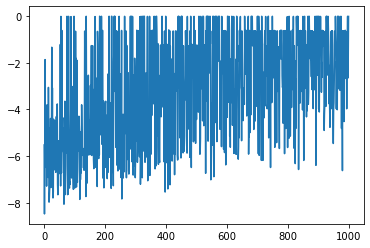

In [99]:
plt.plot(aggr_rewards['avg'])